# El problema

Dados dos puntos $A=(a,x_a)$ y $B=(b,x_b)$ con $a<b$, considere
- la gráfica de todas las funciones $x\in\mathcal{C}^1([a,b],\mathbb{R})$ que conecta a los puntos $A$ y $B$ 
- La superficie de revolución que se genera al girar la gráfica con respecto al eje horizontal.
Se quiere encontrar, de entre todas las curvas que unen a $A$ con $B$, auqella cuya superficie es mínima y el volumen que encierra es igual a un volumen dado.

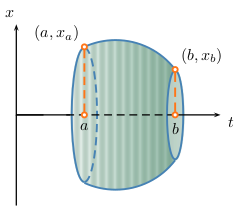

## Un ejemplo en $\mathbb{R}^2$

Dados los puntos $A=(-1,2)$ y $B=(2,5)$ y volumen $v=v_0$ se quiere encontrar una función $x$(*bonita* i.e al menos de clase $\mathcal{C}^1$) cuya gráfica una a $A$ y $B$ de modo que al rotar su gráfica entorno al eje x, el sólido de revolución que se genera tenga la menor área superficial posible. Esto sin dejar de tener volumen $v$

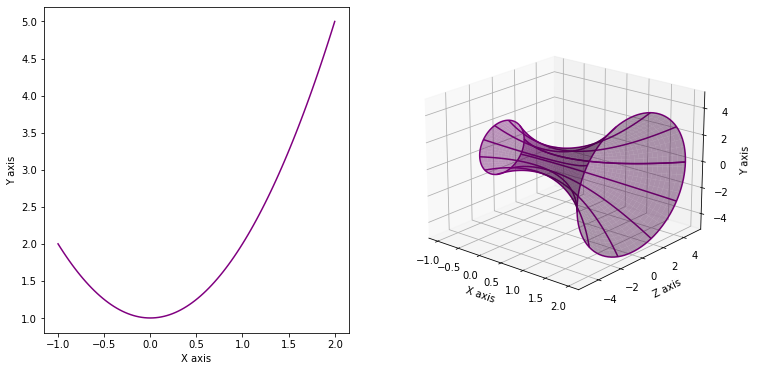

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

n = 100

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

#extremos del intervalo
a,b =-1, 2
#dominio de la funcion
t = np.linspace(a, b, n)
#definicion de la funcion y(t)=2*(-t^2+1)
y_t=t**2+1
theta = np.linspace(0, 2*np.pi, n)
#creamos una malla para t,theta
T, THETA = np.meshgrid(t, theta)
#REFERENCIA PARA MESHGRID: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

#coordenadas del solido de revolucion
Y_T = T**2+1
Y = Y_T*np.cos(THETA)
Z = Y_T*np.sin(THETA)
########
ax1.plot(t,y_t,'purple')
ax2.plot_wireframe(T, Y, Z,rcount=10,ccount=1, color='purple') #mostrar las secciones del solido
ax2.plot_surface(T, Y, Z, color='purple', alpha=0.4)
ax2.view_init(elev=20, azim=-50) #para rotar la grafica
#etiquetar ejes:
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Z axis')
ax2.set_zlabel('Y axis')
plt.show()

# Objetivo

## En palabras

**Encontrar la curva $x^*$ que minimice el área de la superficie generada sujeta a la condición que debe tener un volumen $v\in\mathbb{R}^+$ dado.**

## Matemáticamente

Resolver el problema de optimización
\begin{equation*}
     J[x]=\int_a^b2\pi x(t)\sqrt{1+\dot{x}^2(t)}dt \to \inf_{x\in \mathcal{D}_G} \quad\mbox{sujeto a }\quad G[x]=\int_a^b\pi x^2(t)dt=v
\end{equation*}

en donde $\mathcal{D}_G=\{x\in\mathcal{C}^1 : G[x]=v\}$ es decir el conjunto de funciones que cumplen la restricción.

*La restricción del problema de optimización se define de esa forma pues se quiere que la superficie de área mínima cumpla además con tener volumen $v$ y una manera de obtener el volumen de un sólido de revolución como el buscado es integrando la función $v(x)=\pi x^2$.*

# Métodos numéricos a implementar

* Para hallar la solución numérica al problema de optimización
> Método de Runge Kutta de orden 4. 
Este método sirve para aproximar la solución del problema de valor inicial (i.e una ecuación diferencial con valor incial) del tipo
\begin{equation}
y'=f(t,y)\quad t\in[a,b]\quad y(a)=\alpha
\end{equation}

* Para verificar que la solución satisface la restricción
> Algún método de integración visto en clase